In [15]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings 
warnings.filterwarnings('ignore')

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
#loading the data into dataframe
df=pd.read_csv(r'C:/Users/ICON/Desktop/ProjectML/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


##performing data analysis

In [17]:
print('Shape of the data:')
print('Number of features: ', df.shape[1])
print('Number of instances: ', df.shape[0])

Shape of the data:
Number of features:  13
Number of instances:  374


In [18]:
print('Features of Dataset:')
for col in df.columns:
    print('   ', col)

Features of Dataset:
    Person ID
    Gender
    Age
    Occupation
    Sleep Duration
    Quality of Sleep
    Physical Activity Level
    Stress Level
    BMI Category
    Blood Pressure
    Heart Rate
    Daily Steps
    Sleep Disorder


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [20]:
#identifying the null values and getting total sum of null val in each feature
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [21]:
#identifying duplicate values
df.duplicated().sum()

0

In [22]:
#filling null values
df=df.fillna('Normal')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [23]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [24]:
df= df.drop('Person ID', axis=1)
df.shape

(374, 12)

In [25]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [26]:
bp = df['Blood Pressure']
bp.head()

0    126/83
1    125/80
2    125/80
3    140/90
4    140/90
Name: Blood Pressure, dtype: object

In [27]:
#splitting feature bp in systolic Bp in diastolic Bp
low_bp = bp.str.split("/").str.get(1)
high_bp = bp.str.split("/").str.get(0)
df['Systolic BP']= high_bp.astype(int)
df['Diastolic BP']= low_bp.astype(int)
df = df.drop(['Blood Pressure'],axis=1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Normal,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [14]:
df.shape

(374, 13)

In [15]:
df['BMI Category'] = df['BMI Category'].replace(to_replace='Normal Weight',
                                               value='Under Weight')

##Performing EDA (Exploratory Data Analysis)

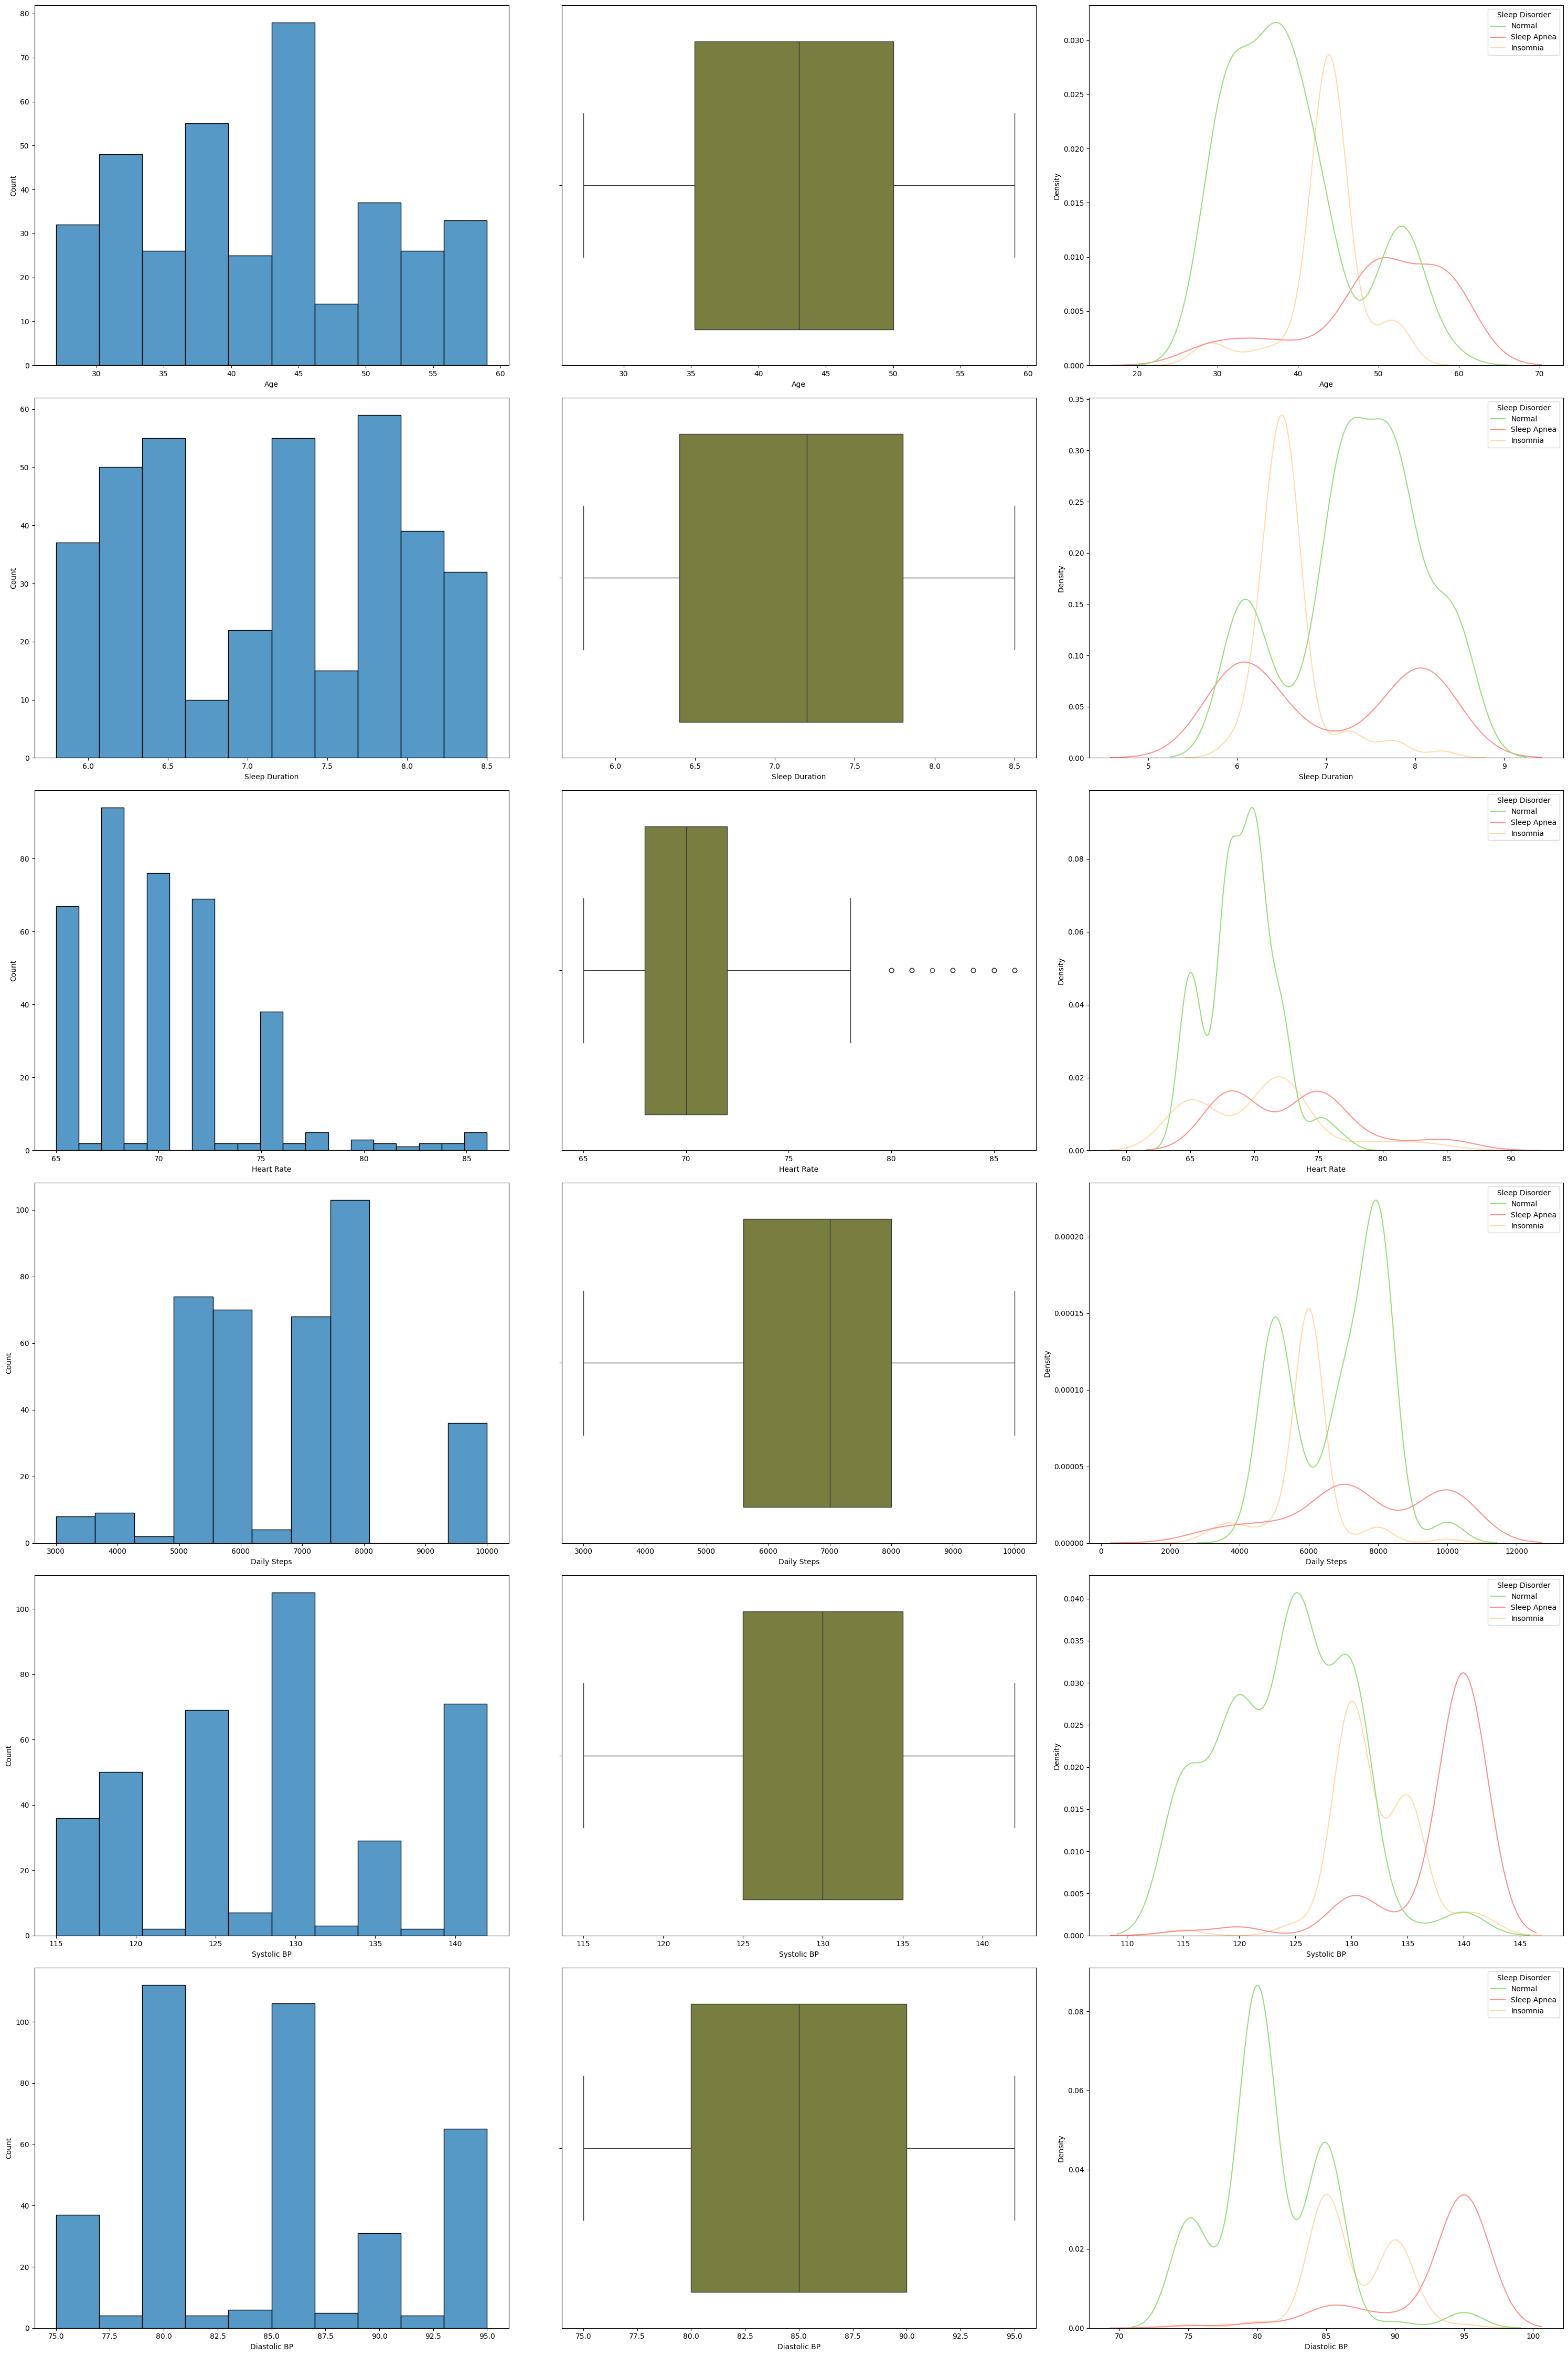

In [16]:
num_features = ['Age','Sleep Duration','Heart Rate','Daily Steps','Systolic BP','Diastolic BP']
colors= ['#808836','#FFBF00','#D10363','#6FB2D2','#85C88A','#EBD671','#EEEEEE',
         '#00224D','#FF9A00','#AF8F6F']

fig, axs = plt.subplots(nrows=6,ncols=3,figsize=(30,45))

for i in range(6):
    ax1 = sns.histplot(data=df,x=num_features[i],ax=axs[i,0],palette=colors)
    ax2 = sns.boxplot(data=df,x=num_features[i],ax=axs[i,1],palette=colors)
    ax3 = sns.kdeplot(data=df,x=num_features[i],hue='Sleep Disorder',ax=axs[i,2],palette=['#9ADE7B',
                        '#FF8F8F','#FFDBAA'])
    
plt.tight_layout()

Text(0.5, 1.0, 'Type of Sleep Disorder')

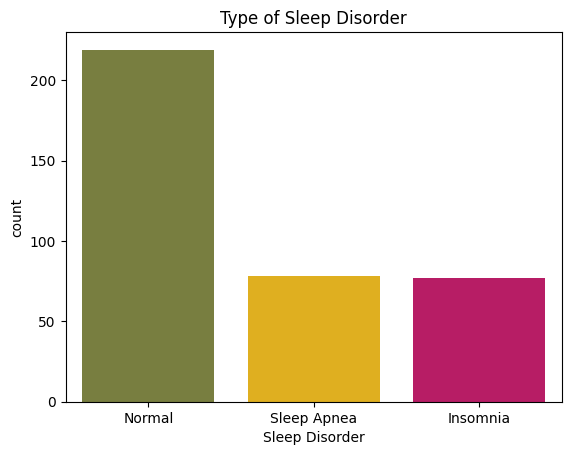

In [17]:
graph = sns.countplot(data=df,x='Sleep Disorder',palette=colors)
plt.title('Type of Sleep Disorder')

Text(0.5, 1.0, 'Gender distribution')

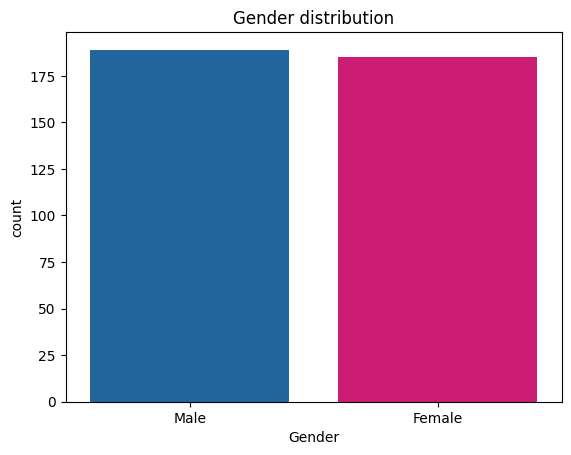

In [18]:
sns.countplot(data=df, x='Gender',palette=['#0F67B1','#E90074'])
plt.title('Gender distribution')

Text(0.5, 1.0, 'Distribution of occupations')

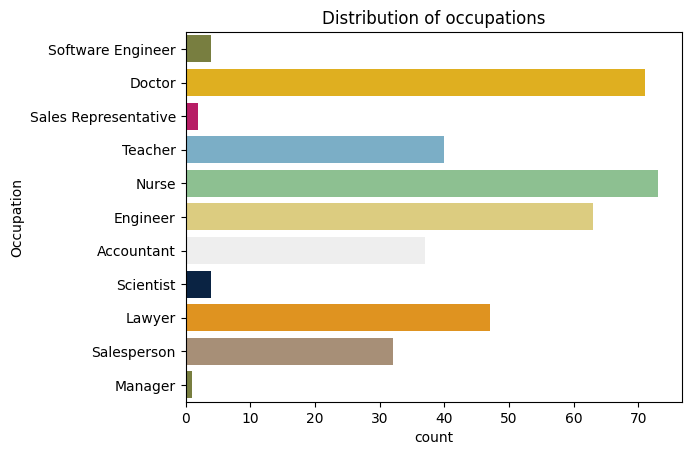

In [19]:
graph = sns.countplot(data=df, y='Occupation', palette=colors)
plt.title('Distribution of occupations')


Text(0.5, 1.0, 'Quality of Sleep')

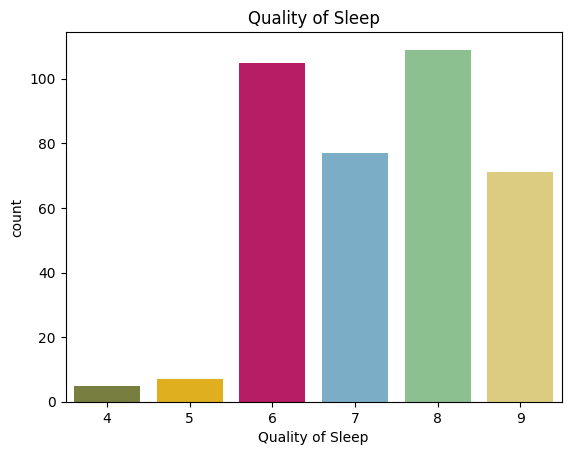

In [20]:
graph = sns.countplot(data=df, x='Quality of Sleep', palette=colors)
plt.title('Quality of Sleep')

In [21]:
df['Physical Activity Level'].nunique()

16

Text(0.5, 1.0, 'Activity Level')

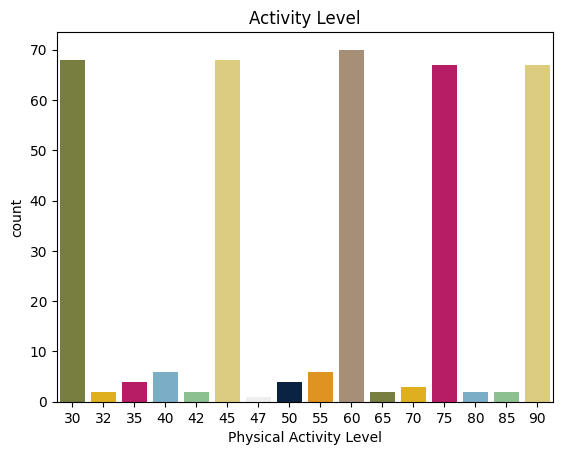

In [22]:
graph = sns.countplot(data=df, x='Physical Activity Level', palette=colors)
plt.title('Activity Level')

Text(0.5, 1.0, 'Stress Level')

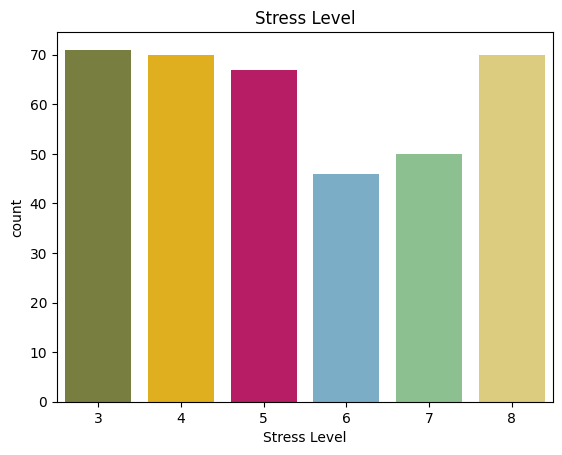

In [23]:
graph = sns.countplot(data=df, x='Stress Level', palette=colors)
plt.title('Stress Level')

Text(0.5, 1.0, 'BMI')

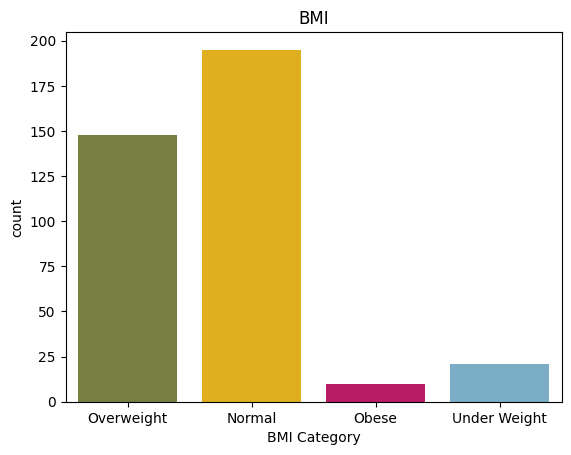

In [24]:
graph = sns.countplot(data=df, x='BMI Category', palette=colors)
plt.title('BMI')

Text(0.5, 1.0, 'BMI')

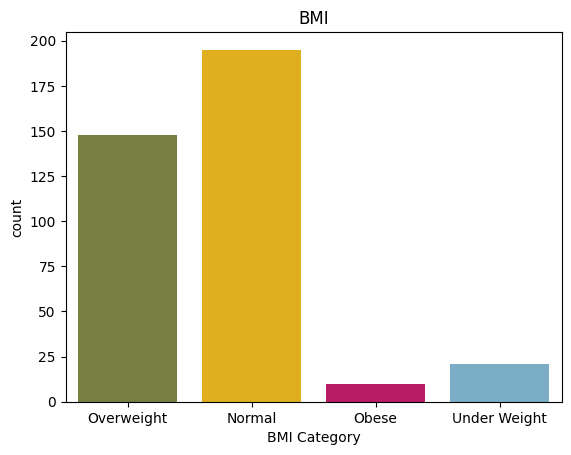

In [25]:
graph = sns.countplot(data=df, x='BMI Category', palette=colors)
plt.title('BMI')

In [26]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Normal,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [27]:
cat_features = ['Gender', 'Occupation','BMI Category', 'Quality of Sleep','Physical Activity Level','Stress Level','Sleep Disorder']

num_features = ['Age','Sleep Duration','Heart Rate','Daily Steps','Systolic BP','Diastolic BP']

In [28]:
colors = ['#7BD3EA','#F4538A','#F5DD61','#A1EEBD','#F6F7C4','#F6D6D6', '#59D5E0','#FAA300']

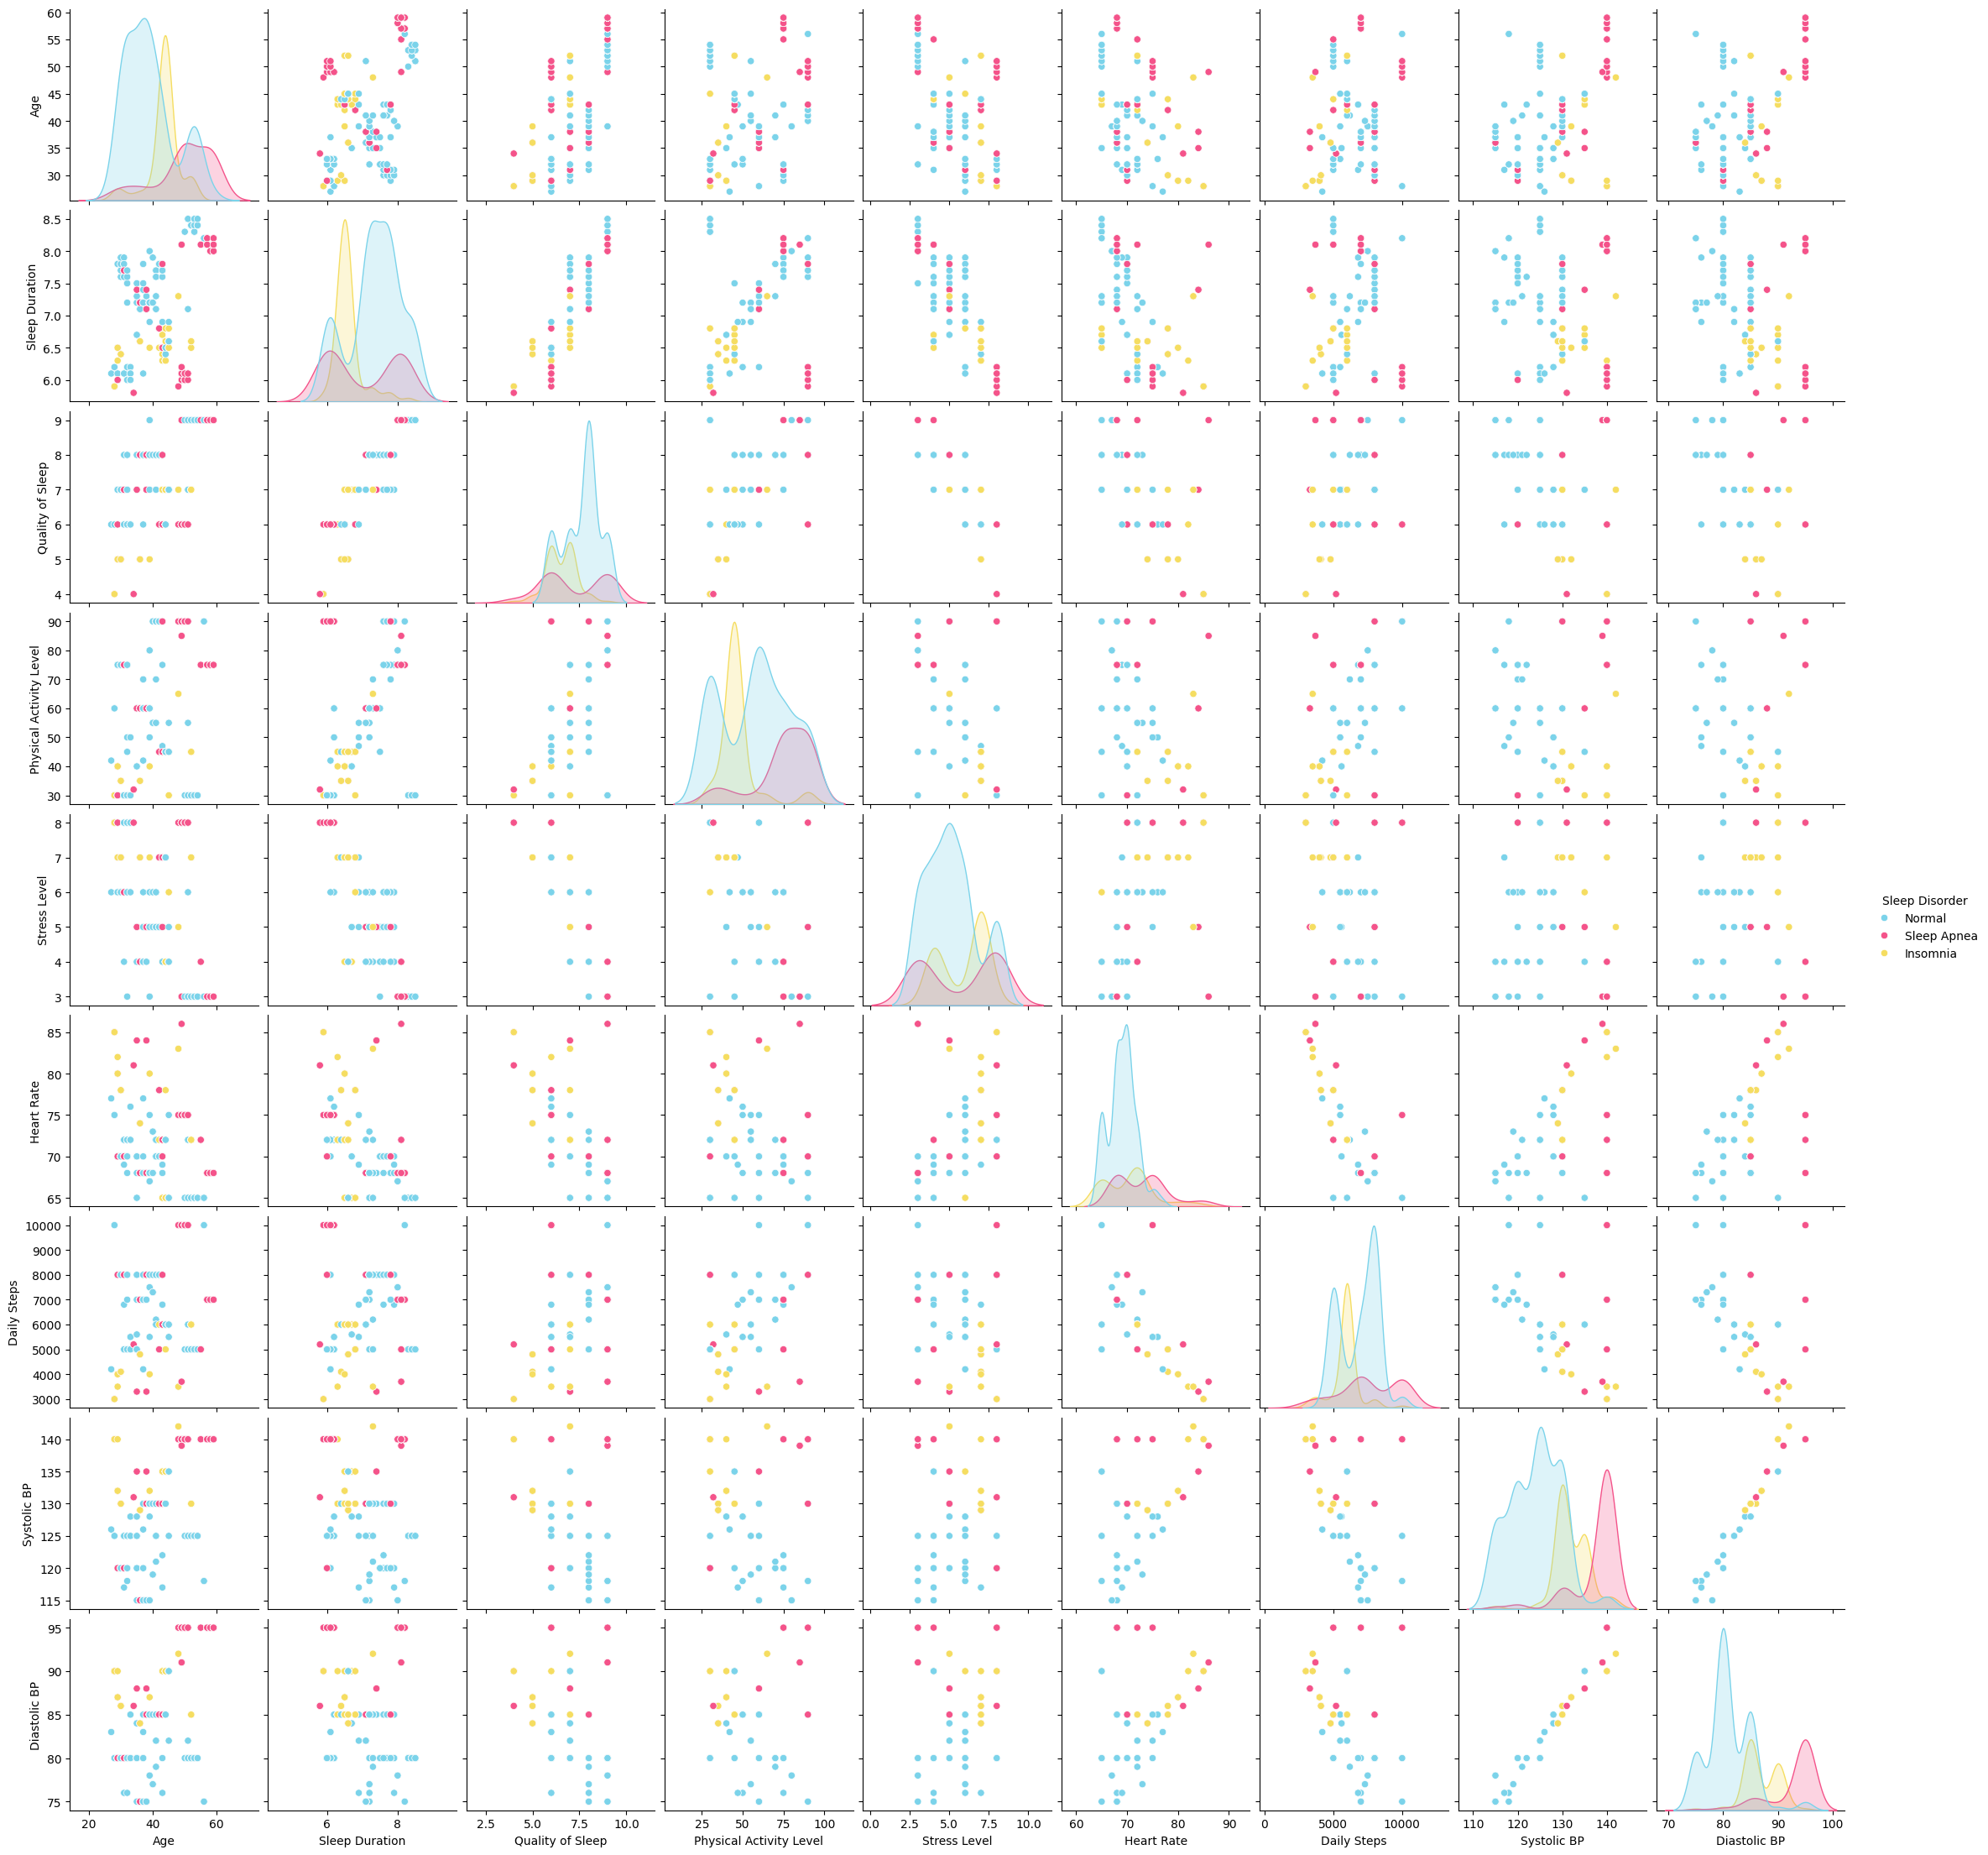

In [29]:
sns.pairplot(df, hue='Sleep Disorder', palette=colors)

In [30]:
from scipy import stats

male_data = df.loc[df['Gender']=='Male']
female_data = df.loc[df['Gender']=='Female']
sleep_quality_male = male_data['Quality of Sleep']
sleep_quality_female = female_data['Quality of Sleep']

t_statistic, p_value = stats.ttest_ind(sleep_quality_male, sleep_quality_female)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -5.874547760454642
p-value: 9.416446532689304e-09


In [31]:
print('Mean Quality of Sleep of males: ', sleep_quality_male.mean())
print('Mean Quality of Sleep females: ', sleep_quality_female.mean())

Mean Quality of Sleep of males:  6.968253968253968
Mean Quality of Sleep females:  7.664864864864865


In [32]:
# Encode the target variable if it's categorical
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Normal,126,83
1,1,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
2,1,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
3,1,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,1,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [33]:
df['Occupation'] = le.fit_transform(df['Occupation'])
df.nunique()

Gender                      2
Age                        31
Occupation                 11
Sleep Duration             27
Quality of Sleep            6
Physical Activity Level    16
Stress Level                6
BMI Category                4
Heart Rate                 19
Daily Steps                20
Sleep Disorder              3
Systolic BP                18
Diastolic BP               17
dtype: int64

In [34]:
df['BMI Category'] = le.fit_transform(df['BMI Category'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,2,77,4200,Normal,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,Normal,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,Normal,125,80
3,1,28,6,5.9,4,30,8,1,85,3000,Sleep Apnea,140,90
4,1,28,6,5.9,4,30,8,1,85,3000,Sleep Apnea,140,90


In [35]:
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,1,85,3000,2,140,90


In [36]:
#training the model using random forest classifier

X= df.drop(columns=['Sleep Disorder'])
y= df['Sleep Disorder']

In [37]:
models = {
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [38]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

--- Decision Tree Classifier ---
Accuracy: 0.88
Confusion Matrix:
 [[13  1  2]
 [ 1 42  0]
 [ 4  1 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



--- Support Vector Machine ---
Accuracy: 0.9066666666666666
Confusion Matrix:
 [[14  1  1]
 [ 1 42  0]
 [ 3  1 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.95      0.98      0.97        43
           2       0.92      0.75      0.83        16

    accuracy                           0.91        75
   macro avg       0.89      0.87      0.87        75
weighted avg       0.91